Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












## Replicate the 538 IMDB "An Inconvenient Truth" Visualization

In [0]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
# Read data from Github
df_imdb = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv')
df_imdb.sample(10)

,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
62563,2017-08-23 13:50:03.715674,644,Males Aged 30-44,http://www.imdb.com/title/tt6322922/ratings-ma...,5.5,5.4,6,258,20,10,2,18,28,44,29,37,198,40.1,3.1,1.6,0.3,2.8,4.3,6.8,4.5,5.7,30.7
6861,2017-08-01 15:00:06.052080,33,Top 1000 voters,http://www.imdb.com/title/tt6322922/ratings-to...,4.7,4.8,5,9,3,2,2,4,2,3,2,0,6,27.3,9.1,6.1,6.1,12.1,6.1,9.1,6.1,0.0,18.2
67351,2017-08-25 07:50:03.859171,658,Males Aged 30-44,http://www.imdb.com/title/tt6322922/ratings-ma...,5.5,5.3,6,263,20,10,2,20,30,48,30,37,198,40.0,3.0,1.5,0.3,3.0,4.6,7.3,4.6,5.6,30.1
48581,2017-08-18 11:10:04.637400,489,Aged 45+,http://www.imdb.com/title/tt6322922/ratings-age_4,4.2,4.7,2,231,25,13,1,8,13,20,27,31,120,47.2,5.1,2.7,0.2,1.6,2.7,4.1,5.5,6.3,24.5
69943,2017-08-26 06:30:05.760533,537,Non-US users,http://www.imdb.com/title/tt6322922/ratings-in...,6.4,6.5,7,126,11,10,8,30,40,45,33,34,200,23.5,2.0,1.9,1.5,5.6,7.4,8.4,6.1,6.3,37.2
79830,2017-08-29 21:20:03.222769,454,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.4,6.6,8,117,3,6,8,17,25,35,29,23,191,25.8,0.7,1.3,1.8,3.7,5.5,7.7,6.4,5.1,42.1
50754,2017-08-19 06:10:06.591114,2422,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.2,5.5,6,980,64,39,19,43,79,110,111,129,848,40.5,2.6,1.6,0.8,1.8,3.3,4.5,4.6,5.3,35.0
29635,2017-08-11 12:50:03.644381,591,Aged 30-44,http://www.imdb.com/title/tt6322922/ratings-age_3,5.3,5.5,6,243,20,8,3,11,16,23,20,33,214,41.1,3.4,1.4,0.5,1.9,2.7,3.9,3.4,5.6,36.2
17288,2017-08-07 00:10:04.579636,325,Aged 45+,http://www.imdb.com/title/tt6322922/ratings-age_4,4.2,4.8,2,162,14,4,0,1,6,8,17,21,92,49.8,4.3,1.2,0.0,0.3,1.8,2.5,5.2,6.5,28.3
58968,2017-08-22 06:20:03.048247,423,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.3,6.5,8,117,3,6,7,15,20,28,23,20,184,27.7,0.7,1.4,1.7,3.5,4.7,6.6,5.4,4.7,43.5


In [10]:
# Create a column/attribute of datetime objects from timestamps
df_imdb['time_stamp'] = pd.to_datetime(df_imdb['timestamp'])
df_imdb['timestamp'].sample(10)

73542    2017-08-27 14:10:03.981346
33214    2017-08-12 20:10:06.085934
13053    2017-08-05 11:00:05.465850
62640    2017-08-23 14:30:04.216021
32469    2017-08-12 13:40:04.485592
40479    2017-08-15 12:00:03.059160
76259    2017-08-28 14:00:04.104310
68968    2017-08-25 22:00:04.768241
61945    2017-08-23 08:20:05.471479
2050     2017-07-22 01:00:04.694418
Name: timestamp, dtype: object

In [11]:
# Set the dataframe's index to the datetime object (serving as a unique identifier for each observation)
df_imdb.set_index('time_stamp', inplace=True)
df_imdb.tail(5)

,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
time_stamp,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-29 23:10:05.369510,2017-08-29 23:10:05.369510,8,IMDb staff,http://www.imdb.com/title/tt6322922/ratings-im...,8.4,7.2,8,1,0,0,0,0,1,1,2,2,1,12.5,0.0,0.0,0.0,0.0,12.5,12.5,25.0,25.0,12.5
2017-08-29 23:10:05.598331,2017-08-29 23:10:05.598331,41,Top 1000 voters,http://www.imdb.com/title/tt6322922/ratings-to...,4.6,4.7,5,11,4,2,2,5,4,5,1,1,6,26.8,9.8,4.9,4.9,12.2,9.8,12.2,2.4,2.4,14.6
2017-08-29 23:10:05.794141,2017-08-29 23:10:05.794141,925,US users,http://www.imdb.com/title/tt6322922/ratings-usa,4.8,5.0,4,405,34,20,8,9,30,54,46,60,259,43.8,3.7,2.2,0.9,1.0,3.2,5.8,5.0,6.5,28.0
2017-08-29 23:10:06.022268,2017-08-29 23:10:06.022268,565,Non-US users,http://www.imdb.com/title/tt6322922/ratings-in...,6.4,6.5,7,129,11,10,8,32,47,52,37,35,204,22.8,1.9,1.8,1.4,5.7,8.3,9.2,6.5,6.2,36.1
2017-08-29 23:10:06.218251,2017-08-29 23:10:06.218251,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


In [12]:
# Grab rows corresponding to the last day
df_imdb_lastday = df_imdb['2017-08-29']
df_imdb_lastday.sample(5)

,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
time_stamp,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-29 04:30:04.266231,2017-08-29 04:30:04.266231,539,Aged 45+,http://www.imdb.com/title/tt6322922/ratings-age_4,4.4,4.8,2,245,28,13,3,8,19,24,32,35,132,45.5,5.2,2.4,0.6,1.5,3.5,4.5,5.9,6.5,24.5
2017-08-29 00:00:04.225962,2017-08-29 00:00:04.225962,679,Males Aged 30-44,http://www.imdb.com/title/tt6322922/ratings-ma...,5.5,5.3,6,270,20,10,2,20,33,51,34,39,200,39.8,2.9,1.5,0.3,2.9,4.9,7.5,5.0,5.7,29.5
2017-08-29 15:10:02.620575,2017-08-29 15:10:02.620575,15,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.5,5.3,5,7,0,0,0,1,0,1,0,0,6,46.7,0.0,0.0,0.0,6.7,0.0,6.7,0.0,0.0,40.0
2017-08-29 17:30:07.007412,2017-08-29 17:30:07.007412,2653,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,108,152,146,144,895,38.5,2.6,1.4,0.9,2.1,4.1,5.7,5.5,5.4,33.7
2017-08-29 14:10:04.103145,2017-08-29 14:10:04.103145,76,Females Aged 30-44,http://www.imdb.com/title/tt6322922/ratings-fe...,7.5,8.0,10,11,0,2,2,0,2,1,2,9,47,14.5,0.0,2.6,2.6,0.0,2.6,1.3,2.6,11.8,61.8


In [13]:
# Filter down to IMDB user in the last day dataset
df_imdb_lastday_filtered = df_imdb_lastday[df_imdb_lastday['category'] == 'IMDb users']
df_imdb_lastday_filtered.shape

(140, 27)

In [14]:
# Grab the last IMDB observation from the last day and take a look
df_imdb_lastday_filtered_finalobs = df_imdb_lastday_filtered.tail(1)
df_imdb_lastday_filtered_finalobs.T

time_stamp,2017-08-29 23:10:06.218251
timestamp,2017-08-29 23:10:06.218251
respondents,2662
category,IMDb users
link,http://www.imdb.com/title/tt6322922/ratings
average,5.4
mean,5.6
median,7
1_votes,1021
2_votes,69
3_votes,38


In [15]:
# Construct a list of percentage columns for use downstream
cols_pct = ['1_pct', '2_pct', '3_pct', '4_pct', '5_pct', '6_pct', '7_pct', '8_pct', '9_pct', '10_pct']
# View the percentage columns
df_imdb_lastday_filtered_finalobs[cols_pct].T

time_stamp,2017-08-29 23:10:06.218251
1_pct,38.4
2_pct,2.6
3_pct,1.4
4_pct,0.9
5_pct,2.1
6_pct,4.1
7_pct,5.8
8_pct,5.5
9_pct,5.5
10_pct,33.7


In [16]:
# Construct a plot dataframe
df_plot_data = df_imdb_lastday_filtered_finalobs[cols_pct].T
df_plot_data.index = range(1, 11)   # reset the index
df_plot_data.columns = ['percent']  # set the column name
df_plot_data

,percent
1,38.4
2,2.6
3,1.4
4,0.9
5,2.1
6,4.1
7,5.8
8,5.5
9,5.5
10,33.7


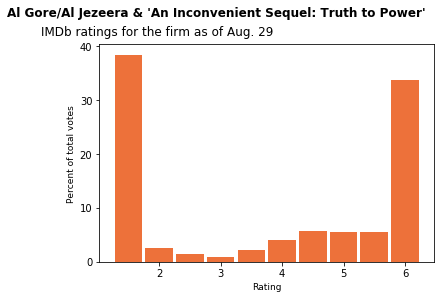

In [17]:
# Construct a plotting object
fig, ax = plt.subplots()

# Set plot's background color
fig.patch.set(facecolor="white")

# Set the bars
ax.bar(x=range(1, 11), height=df_plot_data['percent'], width=0.9, color='#ED713A')

# Set the axes backround color
ax.set(facecolor="white")

# Set the title and subtitle
ax.set_title("Al Gore/Al Jezeera & 'An Inconvenient Sequel: Truth to Power'",
             fontsize=12,
             x=.35,
             y=1.1,
             fontweight='bold')
ax.text(s="IMDb ratings for the firm as of Aug. 29", fontsize=12, x=-1.85, y=42)

# Set the x and y axes labels
ax.set_xlabel("Rating", fontsize=9)
ax.set_ylabel("Percent of total votes", fontsize=9)

# Fix the x an y axis tick marks and grid
ax.set_xticklabels(range(1, 11), rotation=0)
ax.set_yticklabels(range(0, 50, 10))
ax.set_yticks(range(0, 50, 10));

## 538: Who Goes to Meaningless NFL Games
Produce the "Ticket Prices Drop For Most NFL Teams Eliminated From the Playoffs" Visualization

(https://fivethirtyeight.com/features/who-goes-to-meaningless-nfl-games-and-why/)

In [2]:
# Get the pertinent datasets
df_2014_avg_tix_price = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/nfl-ticket-prices/2014-average-ticket-price.csv')
df_2014_avg_national = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/nfl-ticket-prices/national-average.csv')

# Remove rows that include null 'cell' values
df_2014_avg_tix_price = df_2014_avg_tix_price.dropna()
df_2014_avg_national = df_2014_avg_national.dropna()

# Take a look at a couple observations
print(df_2014_avg_tix_price.sample(1))
print(df_2014_avg_national.sample(1))
df_2014_avg_tix_price

                                                Event   Division  Avg TP, $
46  Jacksonville Jaguars at Tennessee Titans Ticke...  AFC South       45.0
                         Genre  Avg TP, $
15  Kansas City Chiefs Tickets         67


,Event,Division,"Avg TP, $"
0,Baltimore Ravens at Pittsburgh Steelers Ticket...,AFC North,202.0
1,Pittsburgh Steelers at Baltimore Ravens Ticket...,AFC North,199.0
2,Cleveland Browns at Pittsburgh Steelers Ticket...,AFC North,196.0
3,Cincinnati Bengals at Pittsburgh Steelers Tick...,AFC North,164.0
4,Pittsburgh Steelers at Cleveland Browns Ticket...,AFC North,148.0
...,...,...,...
91,Atlanta Falcons at Tampa Bay Buccaneers Ticket...,NFC South,70.0
92,Carolina Panthers at Tampa Bay Buccaneers Tick...,NFC South,70.0
93,Tampa Bay Buccaneers at Atlanta Falcons Ticket...,NFC South,51.0
94,Tampa Bay Buccaneers at Carolina Panthers Tick...,NFC South,48.0


In [8]:
# Create a list of games featured in the 538 visualization
lst_games = [
    'Dallas Cowboys at Washington Redskins',
    'Philadelphia Eagles at Washington Redskins',
    'New York Jets at Miami Dolphins',
    'New England Patriots at New York Jets',
    'Chicago Bears at Minnesota Vikings',
    'New Orleans Saints at Tampa Bay Buccaneers',
    'Philadelphia Eagles at New York Giants',
    'Arizona Cardinals at San Francisco 49ers',
    'Indianapolis Colts at Tennessee Titans',
    'Kansas City Chiefs at Oakland Raiders',
    'Houston Texans at Jacksonville Jaguars',
    'Miami Dolphins at New York Jets',
    'Tennessee Titans at Jacksonville Jaguars',
    'Washington Redskins at New York Giants'
]

dict_frnch = {
    "Arizona Cardinals":"ARI",
    "Chicago Bears":"CHI",
    "Dallas Cowboys":"DAL",
    "Houston Texans":"HOU",
    "Indianapolis Colts":"IND",
    "Jacksonville Jaguars":"JAC",
    "Kansas City Chiefs":"KC",
    "Miami Dolphins":"MIA",
    "Minnesota Vikings":"MIN",
    "New England Patriots":"NE",
    "New Orleans Saints":"NO",
    "New York Giants":"NYG",
    "New York Jets":"NYJ",
    "Oakland Raiders":"OAK",
    "Philadelphia Eagles":"PHI",
    "San Francisco 49ers":"SF",
    "Tampa Bay Buccaneers":"TB",
    "Tennessee Titans":"TEN",
    "Washington Redskins":"WAS"}

# Construct a dataframe with the data surfaced in the visualization
df_538_plot = pd.DataFrame(lst_games, columns=['matchup'])

# Iterate through df_2014_avg_tix_price dataframe and grab the average ticket price for that matchup
lst_prices = []
for game in lst_games:
  # Create a temp dataframe of one row that matches the game being iterated over
  df_temp = df_2014_avg_tix_price[df_2014_avg_tix_price['Event'].str.startswith(game)]

  # Extract the price from the temp dataframe
  tmp_price = df_temp.iloc[0]['Avg TP, $']

  # Append to a list of prices
  lst_prices.append(tmp_price)

# Add a price column to the df_538_plot dataframe
df_538_plot['avg_price'] = lst_prices

# Add a column identifying the home team in the matchup
def extract_teams(str):
  tmp_lst = str.split(' at ')
  return {"away": tmp_lst[0].strip(), "home": tmp_lst[1].strip()}

# Iterate through the matchups and generate a list of home and away teams
lst_home_teams = []
lst_away_teams = []
for game in lst_games:
  tmp_dict = extract_teams(game)
  lst_home_teams.append(tmp_dict['home'])
  lst_away_teams.append(tmp_dict['away'])

# Add a home team column to the df_538_plot dataframe
df_538_plot['home_team'] = lst_home_teams
df_538_plot['away_team'] = lst_away_teams
df_538_plot

# Iterate the df_2014_avg_national dataframe and grab the average home ticket price
lst_home_avg_price = []
for team in lst_home_teams:
    # Create a temp dataframe of one row that matches the home team being iterated on
    df_temp = df_2014_avg_national[df_2014_avg_national['Genre'].str.startswith(team) ]

    # Extract the price from the temp dataframe
    tmp_price = df_temp.iloc[0]['Avg TP, $']

    # Append to a list of prices
    lst_home_avg_price.append(tmp_price)

# Add an average home team price column to the df_538_plot dataframe
df_538_plot['avg_home_price'] = lst_home_avg_price

# Iterate over the plot dataframe and build home and away franchise abbreviations and the ticket price difference
lst_away_frnch = []
lst_home_frnch = []
lst_price_diff = []
for index, row in df_538_plot.iterrows():
    # Generate the franchise label
    tmp_away = dict_frnch[row['away_team']]
    tmp_home = dict_frnch[row['home_team']]
    tmp_diff = row['avg_price'] - row['avg_home_price']

    # Append labels to lists (so we can add to the dataframe)
    lst_away_frnch.append(tmp_away)
    lst_home_frnch.append(tmp_home)
    lst_price_diff.append(tmp_diff)

# Add the label lists to the dataframe
df_538_plot['home_franchise'] = lst_home_frnch
df_538_plot['away_franchise'] = lst_away_frnch
df_538_plot['price_diff'] = lst_price_diff
df_538_plot


,matchup,avg_price,home_team,away_team,avg_home_price,home_franchise,away_franchise,price_diff
0,Dallas Cowboys at Washington Redskins,165.0,Washington Redskins,Dallas Cowboys,76,WAS,DAL,89.0
1,Philadelphia Eagles at Washington Redskins,100.0,Washington Redskins,Philadelphia Eagles,76,WAS,PHI,24.0
2,New York Jets at Miami Dolphins,108.0,Miami Dolphins,New York Jets,90,MIA,NYJ,18.0
3,New England Patriots at New York Jets,106.0,New York Jets,New England Patriots,96,NYJ,NE,10.0
4,Chicago Bears at Minnesota Vikings,67.0,Minnesota Vikings,Chicago Bears,71,MIN,CHI,-4.0
5,New Orleans Saints at Tampa Bay Buccaneers,77.0,Tampa Bay Buccaneers,New Orleans Saints,85,TB,NO,-8.0
6,Philadelphia Eagles at New York Giants,178.0,New York Giants,Philadelphia Eagles,187,NYG,PHI,-9.0
7,Arizona Cardinals at San Francisco 49ers,202.0,San Francisco 49ers,Arizona Cardinals,221,SF,ARI,-19.0
8,Indianapolis Colts at Tennessee Titans,64.0,Tennessee Titans,Indianapolis Colts,85,TEN,IND,-21.0
9,Kansas City Chiefs at Oakland Raiders,40.0,Oakland Raiders,Kansas City Chiefs,77,OAK,KC,-37.0


In [0]:
# Build a plot using the constructed df_538_plot dataframe
fig, ax = plt.subplots()

# Set the background color
fig.patch.set(facecolor="lightgray")

# Set the axes background color
ax.set(facecolor="lightgray")

# Set the title and subtitle
ax.set_title("Ticket Prices Drop For Most NFL Teams Eliminated From The Playoffs",
             fontsize=16,
             x=.35,
             y=1.1,
             fontweight='bold')
ax.text(s="Difference in average ticket price for divisional game vs. season", fontsize=10, x=-.58, y=1.05)

ax.barh(y_pos, performance, xerr=error, align='center')

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# More Work Here